# Setup

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

# FirstFFNetwork

In [18]:
class FirstFFNetwork:
  
  #intialize the parameters
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    #forward pass - preactivation and activation
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    #back propagation
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    #predicting the results on unseen data
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Train the FF network on the data

C:\Users\pc\AppData\Local\Temp/ipykernel_5068/539790132.py:63: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

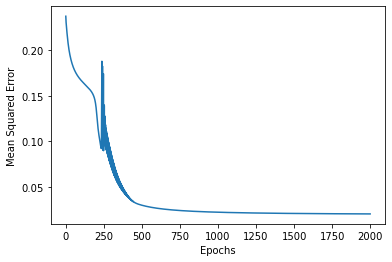

In [27]:
ffn = FirstFFNetwork()
#train the model on the data
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [31]:
#predictions
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

In [32]:
#model performance
print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


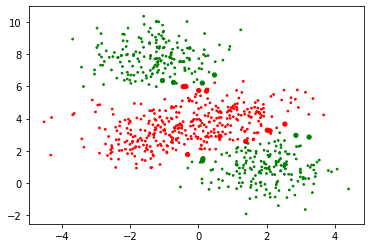

In [33]:
#visualize the predictions
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()